In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipyleaflet import AwesomeIcon, Map, Marker, MarkerCluster
from geopy.geocoders import Nominatim

In [71]:
c_data = pd.read_csv("covid19_cleaned_8_10.zip")
countries = pd.read_csv("countries.csv")

C:\Users\dpale\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10,12,13,14,15,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
c_data.columns

Index(['Unnamed: 0', 'ID', 'age', 'sex', 'city', 'province', 'country',
       'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'chronic_disease',
       'outcome', 'date_death_or_discharge', 'admin3', 'admin2', 'admin1',
       'travel_history_binary', 'hospitalized', 'deceased', 'fever', 'cough',
       'fatigue', 'headache', 'dizziness', 'sore throat', 'pneumonia',
       'respiratory', 'nausea', 'diarrhea', 'severe_r'],
      dtype='object')

In [4]:
locations = c_data[['latitude', 'longitude', "country", "city", "travel_history_binary"]]
locations = locations.dropna()

In [5]:
locations["travel_history_binary"].value_counts()

0    1425997
1      14267
Name: travel_history_binary, dtype: int64

In [90]:
len(countries.loc[countries["name"] == "Uniteasd States", "latitude"])

0

In [109]:
def applyLat(c):
    if len(countries.loc[countries["name"] == c, "latitude"]) == 0:
        return 0
    return countries.loc[countries["name"] == c, "latitude"].values[0]

def applyLong(c):
    if len(countries.loc[countries["name"] == c, "longitude"]) == 0:
        return 0
    return countries.loc[countries["name"] == c, "longitude"].values[0]
locations["country_lat"] =  locations["country"].apply(applyLat)
locations["country_long"] =  locations["country"].apply(applyLong)


In [1]:
locations

NameError: name 'locations' is not defined

In [64]:
locations.dtypes

latitude                 float64
longitude                float64
country                   object
city                      object
travel_history_binary      int64
dtype: object

In [65]:
latitudes = np.unique(locations["latitude"].to_numpy())
longitudes = np.unique(locations["longitude"].to_numpy())
circle = AwesomeIcon(
    name="fa-circle"
)
pairs = [Marker(icon=circle, location=(lat, long)) for lat, long in zip(latitudes, longitudes)]

In [62]:
latitudes = np.unique(locations["latitude"].to_numpy())
longitudes = np.unique(locations["longitude"].to_numpy())

In [63]:
len(latitudes)

6693

In [43]:
marker_cluster = MarkerCluster(
    markers = pairs
)

In [44]:
m = Map(center=((-29.9216045, -122.53391)), zoom=5)
m.add_layer(marker_cluster)

In [45]:
display(m)

Map(center=[-29.9216045, -122.53391], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

In [ ]:
pairs = [Marker(icon=circle, location=geolocator.geocode(lat, long)) for country in locations["country"]]

In [ ]:
country_cluster = MarkerCluster(
    markers = pairs
)

In [70]:
plt.hist(countryCounts["latitude"])

,latitude,longitude,city,travel_history_binary
country,,,,
Algeria,1239,1239,1239,1239
Angola,4,4,4,4
Argentina,342,342,342,342
Australia,210,210,210,210
Austria,20962,20962,20962,20962
...,...,...,...,...
United States,68058,68058,68058,68058
Venezuela,2,2,2,2
Vietnam,28,28,28,28


In [107]:
travel_histories = (c_data.groupby(["country"]).sum())["travel_history_binary"]

In [108]:
travel_histories

country
Afghanistan              4
Algeria                 22
Andorra                  0
Angola                   0
Argentina               55
                        ..
Venezuela                0
Vietnam                 17
Virgin Islands, U.S.     0
Zambia                   7
Zimbabwe                 7
Name: travel_history_binary, Length: 143, dtype: int64

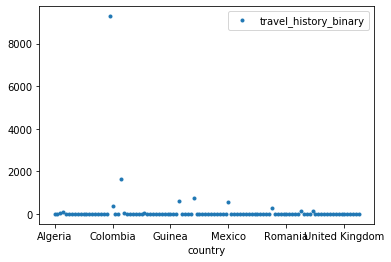

In [103]:
byCountry.plot(y="travel_history_binary", marker=".", linestyle="none")